In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/single_lumen'
eps = 1e-3



======= CHAIN =======
Type         : hydroosmotic
Total length : 4.006655659610342
Current Time : 0
Screening lengths : 
        xi_s = 3.0
        xi_v = 3.0
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 1
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00100
Lumen 1 is at position 2.00333 with length 1.00333 and 1.64875 ions with pumping 0.00100
Lumen -1 is at position 4.00666 with length 0.00000 and 0.00000 ions with pumping 0.00100
======= BRIDGES ======
Bridge 0 : (0, 1) has length 1.00000 with pumping 0.00000
Bridge 1 : (1, -1) has length 1.00000 with pumping 0.00000



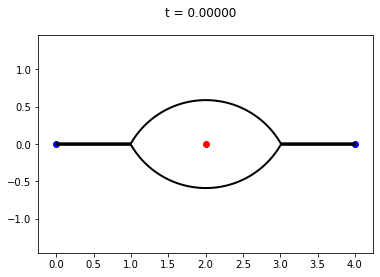

Import successful !


In [2]:
subdir = 'ca1e-3/run0000'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    #tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    #tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)



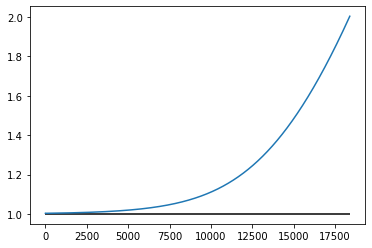

In [3]:
plt.plot(L[:, 0], L[:, 1])
plt.hlines(ch.lumens_dict[1].eps/ch.lumens_dict[1].ca, xmin=0, xmax = np.max(L[:, 0]))

# Single Lumen pumping

Without any lumen nearby, a single lumen is described by the equations
$$\begin{align}
\tau_v \frac{dL}{dt} &= \mu \nu \left[ \delta C - \frac{\epsilon}{L} \right]\\
\tau_s \frac{dN}{dt} &= 2 \nu L \left[ c_a - \delta C \right] \\
\end{align}$$
Assuming $\frac{dL}{dt} = \frac{dN}{dt} = 0$ we have $\delta C = \frac{\epsilon}{L} = c_a$ thus 

$$\begin{align}
L &> \frac{\epsilon}{c_a} \, \text{ the lumen grows} \\
L &< \frac{\epsilon}{c_a} \, \text{ the lumen shrinks} \\
\end{align}$$


In [6]:
L_dict = {}

In [7]:

subdir = 'ca1e-3'
L_dict[subdir] = {}
for i in range(0, 50) :
    subsubdir = 'run'+str(i).zfill(4)
    conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'config.conf'))
    #print(ch)
    #x = np.linspace(0., ch.total_length, 1001)
    #tools.plot_profile(x, ch)

    #ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

    x_log = 0

    if ch.lumen_type == 'hydroosmotic' :
        L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, subsubdir, 'sim_all.dat'), hydroosmotic=True)
        #tools.plot_evolution(L, nions, ell, x_logscale=x_log)
    L_dict[subdir][i] = L
    #plt.plot(L[:, 0], L[:, 1])
    if i %10 == 0 : print(i)



Import successful !
0
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
10
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
20
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
30
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
40
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import

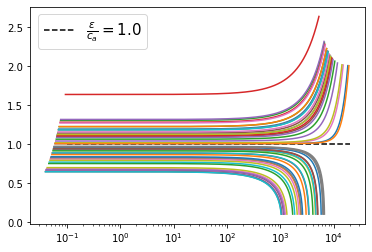

In [8]:
subdir = 'ca1e-3'
ca = 1e-3
plt.xscale('log')
for i in range(0, 50) : 
    try : 
        plt.plot(L_dict[subdir][i][1:, 0], L_dict[subdir][i][1:, 1])
    except : pass
plt.hlines(eps/ca, xmin=1e-1, xmax = 2e4, linestyle = '--', label = r'$\frac{\epsilon}{c_a} = $' + str(eps/ca))   
plt.legend(loc=2, fontsize=15)
plt.show()


In [9]:
subdir = 'ca1.25e-3'
L_dict[subdir] = {}
for i in range(0, 70) :
    subsubdir = 'run'+str(i).zfill(4)
    conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'config.conf'))
    x_log = 0

    if ch.lumen_type == 'hydroosmotic' :
        try : L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, subsubdir, 'sim_all.dat'), hydroosmotic=True)
        except : pass
    L_dict[subdir][i] = L
    if i %10 == 0 : print(i)




Import successful !
0
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
10
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
20
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
30
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
40
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import

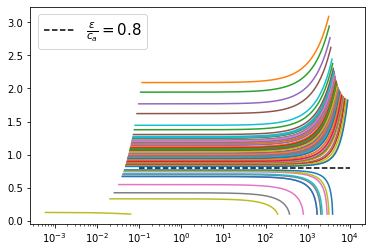

In [10]:
subdir = 'ca1.25e-3'
ca = 1.25e-3
plt.xscale('log')
for i in range(0, 70) : 
    try : 
        plt.plot(L_dict[subdir][i][1:, 0], L_dict[subdir][i][1:, 1])
    except : pass
plt.hlines(eps/ca, xmin=1e-1, xmax = 1e4, linestyle = '--', label = r'$\frac{\epsilon}{c_a} = $' +str(eps/ca))   
plt.legend(loc=2, fontsize=15)
plt.show()

In [11]:
subdir = 'ca8.33e-4'
L_dict[subdir] = {}
for i in range(0, 50) :
    subsubdir = 'run'+str(i).zfill(4)
    try : conf, ch = chain.load_config(os.path.join(main_dir, subdir, subsubdir, 'config.conf'))
    except : pass

    if ch.lumen_type == 'hydroosmotic' :
        try : L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, subsubdir, 'sim_all.dat'), hydroosmotic=True)
        except : pass
    L_dict[subdir][i] = L
    if i %10 == 0 : print(i)





Import successful !
0
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
10
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
20
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
30
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
40
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import successful !
Import

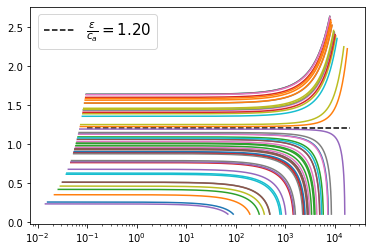

In [12]:
subdir = 'ca8.33e-4'
ca = 8.33e-4
plt.xscale('log')
for i in range(0, 50) : 
    try : 
        plt.plot(L_dict[subdir][i][1:, 0], L_dict[subdir][i][1:, 1])
    except : pass
plt.hlines(eps/ca, xmin=1e-1, xmax = 2e4, linestyle = '--', label = r'$\frac{\epsilon}{c_a} = $' +"{:2.2f}".format(eps/ca))   
plt.legend(loc=2, fontsize=15)
plt.show()

Import config from /Users/mathieuleverge/git/chain_lumen/_data/single_lumen/ca5.623e-2/config
======= CHAIN =======
Type         : hydroosmotic
Total length : 4.0
Current Time : 0
Screening lengths : 
        xi_s = 0.01
        xi_v = 0.0261
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 1
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 2.00000 with length 1.00000 and 1.63783 ions with pumping 0.00562
Lumen -1 is at position 4.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 1.00000 with pumping 0.00000
Bridge 1 : (1, -1) has length 1.00000 with pumping 0.00000



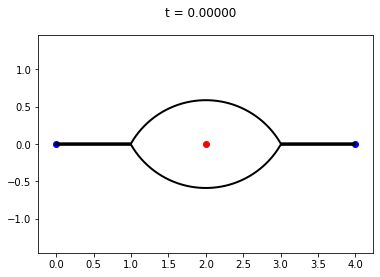

Import successful !


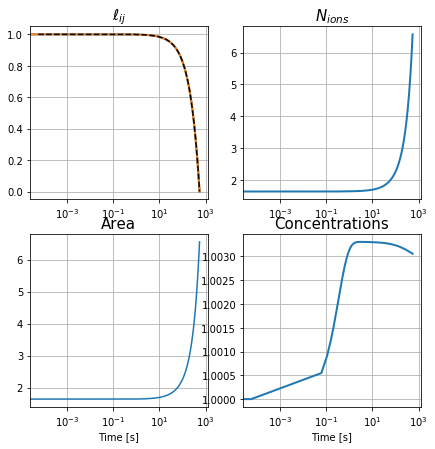

In [228]:
subdir = 'ca5.623e-2'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 1

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    #tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)


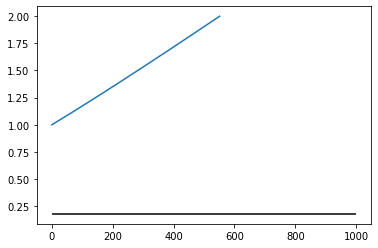

In [229]:
ca = 5.623e-3
plt.plot(L[1:, 0], L[1:, 1])
plt.hlines(eps/ca, xmin=1e-5, xmax=1000.)


# Diagram

In [65]:
npts = 501

eps_min, eps_max = 0., 10.
ca_min, ca_max = 0., 5.

eps_list = np.linspace(eps_min, eps_max, npts)
ca_list = np.linspace(ca_min, ca_max, 2*npts)

extent = [eps_min, eps_max, ca_min, ca_max]

In [66]:
L0 = 1.

fate_array = np.zeros((len(ca_list), len(eps_list)))

for i in range(len(eps_list)) :
    for j in range(len(ca_list)) :
        if ca_list[j] > eps_list[i]/L0 :
            fate_array[i, j] = 1.

IndexError: index 501 is out of bounds for axis 1 with size 501

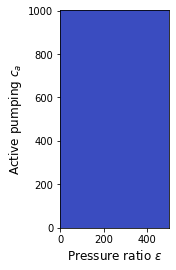

In [64]:
plt.imshow(fate_array, origin='lower', cmap='coolwarm')#, extent = extent)

plt.xlabel(r'Pressure ratio $\epsilon$', fontsize=12)
plt.ylabel(r'Active pumping $c_a$', fontsize=12)
plt.show()